In [11]:
import pandas as pd
import bs4 as bs
import zipfile
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import os

In [135]:
f = [f for f in os.listdir(os.curdir) if os.path.isfile(f)]


for i in f:
   
    if i.split(".")[-1] == 'twbx':
        packagedWorkbook = i
            
        with zipfile.ZipFile(packagedWorkbook, 'r') as zip_ref:
            zip_ref.extractall()
    else:
        packagedWorkbook = ""
        
for i in f:
    print(i.split(".")[-1])
    
    if i.split(".")[-1] == 'twb':
        unpackedWorkbook = i 
        

print('\n')
print('packaged workbook: ' + packagedWorkbook)
print('unpackaged workbook: ' + unpackedWorkbook)

gitignore
csv
pdf
md
ipynb
twb
twbx


packaged workbook: Women in Bank Notes.twbx
unpackaged workbook: Women in Bank Notes.twb


In [84]:
#unpackagedWorkbook = packagedWorkbook.replace('twbx', 'twb')
#unpackagedWorkbook

In [113]:
unpackedWorkbook

'BetweenTheCovers Visualized.twb'

In [114]:
with open(unpackedWorkbook, 'r') as f:
    data = f.read()
    
soup = bs.BeautifulSoup(data, 'html.parser')

calcs = soup.find_all("calculation")

In [115]:
calcs

[<calculation class="tableau" formula="100"></calculation>,
 <calculation class="tableau" formula="1.3"></calculation>,
 <calculation class="tableau" formula="IF [Author gender] = 'F' 
 THEN   [Index]
 ELSE
 -1*[Index]
 END"></calculation>,
 <calculation class="tableau" formula="[List index]- 1"></calculation>,
 <calculation class="tableau" formula="6*[List index]"></calculation>,
 <calculation class="tableau" formula="1"></calculation>,
 <calculation class="tableau" formula="1"></calculation>,
 <calculation class="tableau" formula="100"></calculation>,
 <calculation class="tableau" formula="1"></calculation>,
 <calculation class="tableau" formula="AVG([Index])-50"></calculation>,
 <calculation class="tableau" formula="1"></calculation>,
 <calculation class="tableau" formula="AVG(1.5*[Index])+4"></calculation>,
 <calculation class="tableau" formula="AVG(1.5*[Index])+4"></calculation>,
 <calculation class="tableau" formula="6*[List index]"></calculation>,
 <calculation class="tableau" f

In [116]:
for i in calcs:
    print(i.parent)

<column alias="All" caption="Books" datatype="integer" name="[1 Parameter]" param-domain-type="list" role="measure" type="quantitative" value="100">
<calculation class="tableau" formula="100"></calculation>
<aliases>
<alias key="100" value="All"></alias>
</aliases>
<members>
<member value="3"></member>
<member value="5"></member>
<member value="7"></member>
<member alias="All" value="100"></member>
</members>
</column>
<column caption="1.3" datatype="real" name="[1 (copy)_1499135774514167811]" role="measure" type="quantitative">
<calculation class="tableau" formula="1.3"></calculation>
</column>
<column caption="Index gender dependent" datatype="integer" name="[Calculation_1499135774527135752]" role="measure" type="quantitative">
<calculation class="tableau" formula="IF [Author gender] = 'F' 
THEN   [Index]
ELSE
-1*[Index]
END"></calculation>
</column>
<column caption="LI minus 1" datatype="integer" name="[Calculation_2261158905048940545]" role="measure" type="quantitative">
<calculati

In [117]:
counter = 0

listOfData = []
calcNames = []
calcCaptions = []

for i in calcs:
    thisdict = {}
    
    f2 = (i.parent['name']).replace(']', '')
    f2 = f2.replace('[', '')
    
    thisdict['ind']=counter
    thisdict['caption']=i.parent['caption']
    thisdict['name'] = f2
    thisdict['datatype'] = i.parent['datatype']
    thisdict['formula'] = i['formula']
    
    listOfData.append(thisdict)
    
    calcNames.append(f2)
    calcCaptions.append(i.parent['caption'])
    
    counter = counter + 1

In [118]:
calcDict = dict(zip(calcNames, calcCaptions))
calcDict

{'1 (copy)_1499135774514167811': '1.3',
 '1 Parameter': 'Books',
 'Calculation_1499135774360260610': 'AVG(1.5*[Index])+4',
 'Calculation_1499135774524067847': 'AVG([Index])-70',
 'Calculation_1499135774527135752': 'Index gender dependent',
 'Calculation_1499135774529732617': 'AVG([Index gender dependent])/avg([Index])',
 'Calculation_1499135774531723274': 'AVG([Index])-50',
 'Calculation_2261158905048940545': 'LI minus 1',
 'Calculation_2261158905051070473': 'Dummy bars',
 'Calculation_539024628607000576': '1'}

In [119]:
listOfData

[{'caption': 'Books',
  'datatype': 'integer',
  'formula': '100',
  'ind': 0,
  'name': '1 Parameter'},
 {'caption': '1.3',
  'datatype': 'real',
  'formula': '1.3',
  'ind': 1,
  'name': '1 (copy)_1499135774514167811'},
 {'caption': 'Index gender dependent',
  'datatype': 'integer',
  'formula': "IF [Author gender] = 'F' \r\nTHEN   [Index]\r\nELSE\r\n-1*[Index]\r\nEND",
  'ind': 2,
  'name': 'Calculation_1499135774527135752'},
 {'caption': 'LI minus 1',
  'datatype': 'integer',
  'formula': '[List index]- 1',
  'ind': 3,
  'name': 'Calculation_2261158905048940545'},
 {'caption': 'Dummy bars',
  'datatype': 'integer',
  'formula': '6*[List index]',
  'ind': 4,
  'name': 'Calculation_2261158905051070473'},
 {'caption': '1',
  'datatype': 'integer',
  'formula': '1',
  'ind': 5,
  'name': 'Calculation_539024628607000576'},
 {'caption': '1',
  'datatype': 'integer',
  'formula': '1',
  'ind': 6,
  'name': 'Calculation_539024628607000576'},
 {'caption': 'Books',
  'datatype': 'integer',
 

In [120]:
for i in listOfData:
    for tableauName, friendlyName in calcDict.items():
        i['formula'] = (i['formula']).replace(tableauName, friendlyName)
        
listOfData

[{'caption': 'Books',
  'datatype': 'integer',
  'formula': '100',
  'ind': 0,
  'name': '1 Parameter'},
 {'caption': '1.3',
  'datatype': 'real',
  'formula': '1.3',
  'ind': 1,
  'name': '1 (copy)_1499135774514167811'},
 {'caption': 'Index gender dependent',
  'datatype': 'integer',
  'formula': "IF [Author gender] = 'F' \r\nTHEN   [Index]\r\nELSE\r\n-1*[Index]\r\nEND",
  'ind': 2,
  'name': 'Calculation_1499135774527135752'},
 {'caption': 'LI minus 1',
  'datatype': 'integer',
  'formula': '[List index]- 1',
  'ind': 3,
  'name': 'Calculation_2261158905048940545'},
 {'caption': 'Dummy bars',
  'datatype': 'integer',
  'formula': '6*[List index]',
  'ind': 4,
  'name': 'Calculation_2261158905051070473'},
 {'caption': '1',
  'datatype': 'integer',
  'formula': '1',
  'ind': 5,
  'name': 'Calculation_539024628607000576'},
 {'caption': '1',
  'datatype': 'integer',
  'formula': '1',
  'ind': 6,
  'name': 'Calculation_539024628607000576'},
 {'caption': 'Books',
  'datatype': 'integer',
 

In [121]:
df = pd.DataFrame(listOfData)

In [122]:
df=df[['caption', 'datatype', 'formula']]
df.columns = ['CalculationName', 'DataType', 'Formula']
df=df.sort_values(by='CalculationName')
df=df.drop_duplicates()
df

,CalculationName,DataType,Formula
17,1,integer,1
1,1.3,real,1.3
12,AVG(1.5*[Index])+4,real,AVG(1.5*[Index])+4
16,AVG([Index gender dependent])/avg([Index]),real,AVG([Index gender dependent])/avg([Index])
9,AVG([Index])-50,real,AVG([Index])-50
14,AVG([Index])-70,real,AVG([Index])-70
0,Books,integer,100
13,Dummy bars,integer,6*[List index]
15,Index gender dependent,integer,IF [Author gender] = 'F' \r\nTHEN [Index]\r\...
3,LI minus 1,integer,[List index]- 1


In [123]:
df.head()

,CalculationName,DataType,Formula
17,1,integer,1
1,1.3,real,1.3
12,AVG(1.5*[Index])+4,real,AVG(1.5*[Index])+4
16,AVG([Index gender dependent])/avg([Index]),real,AVG([Index gender dependent])/avg([Index])
9,AVG([Index])-50,real,AVG([Index])-50


In [124]:
df.to_csv('myExportedFormulas.csv', index = False)

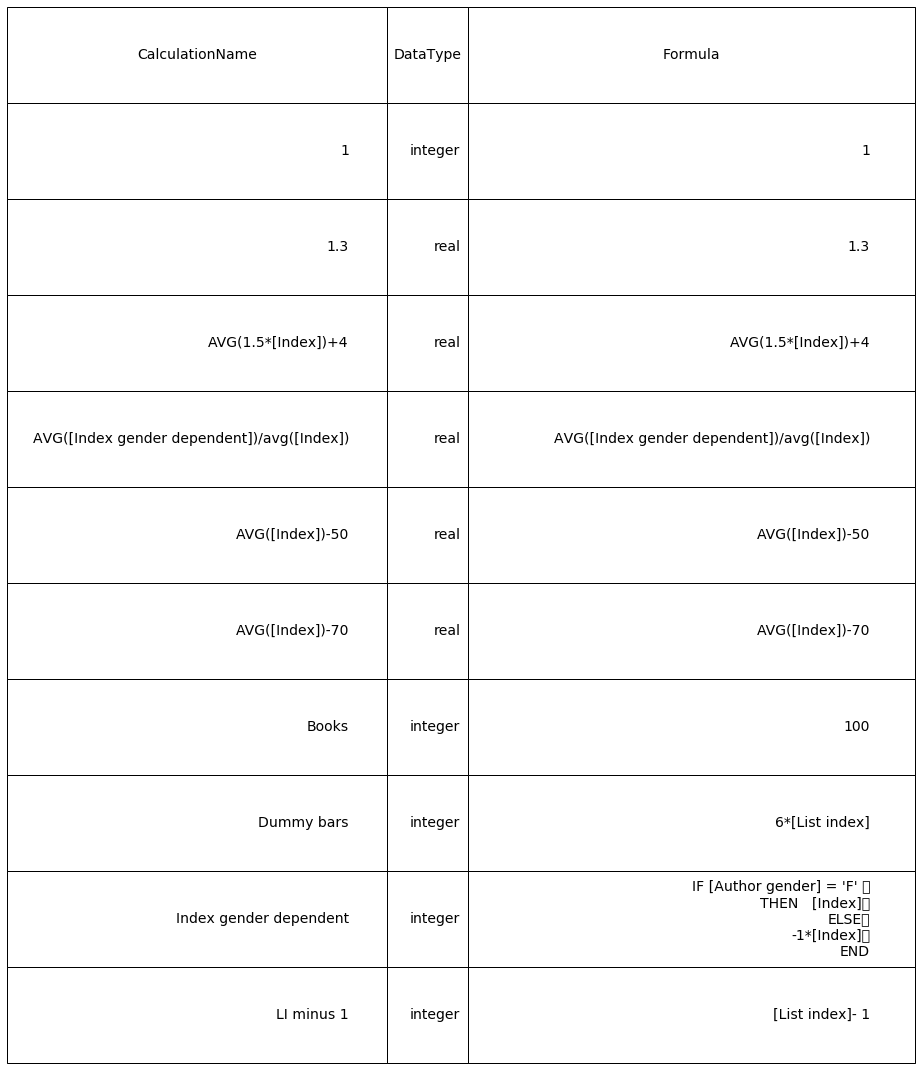

In [125]:
fig, ax = plt.subplots()
ax.axis('tight')
ax.axis('off')

myTable = ax.table(cellText=df.values, colLabels = df.columns, loc='center')
myTable.scale(4,8)
myTable.auto_set_font_size(False)
myTable.set_fontsize(14)

myTable.auto_set_column_width([0,0,1])

pp = PdfPages('myExportedFormulas.pdf')
pp.savefig(fig, bbox_inches = 'tight')
pp.close()